Let's revisit and make explicit the connection between the Monte Carlo tools we've been exploring and the evaluation of integrals.  Consider a function $f(x)$ that is positive and finite on the interval $[a,b]$ as shown in the figure below.  The function is bound by the rectangle defined by $x=a$ to $x=b$ and $y=0$ to $y=y_{\mathrm{max}}$ with area $A_{\mathrm{rect}} = y_{\mathrm{max}}\cdot(b-a)$.  In the *acceptance-rejection method*, we pick $N$ values $x_i$ randomly on the interval $[a,b]$.  The probability to accept a value $x_i$ is $p(x_i) = \frac{f(x_i)}{y_{\mathrm{max}}}$ and in total we accept $n$ values of the $N$ proposals. An estimate of the integral is $I = \int_a^b f(x) dx = A_{\mathrm{rect}}\cdot\frac{n}{N}$.  From above it follows that $n = \sum_{i=1}^N p(x_i) = \frac{1}{y_{\mathrm{max}}}\sum_i f(x_i)$ and thus the integral can be approximated as $I = \frac{b-a}{N}\sum_i f_i = (b-a)\cdot\langle f\rangle$, or alternately $I = (b-a)\cdot E[f]$, i.e. the estimate of the integral $I$ is proportional to the expectation value of $f(x)$ for random variable $x$ distributed uniformly on the interval $[a,b]$. 

Consider the $N$ proposals above as a single trial with a resulting estimate $I_k$ for the integral.  If we repeat this procedure we obtain estimates $\{I_k\}$.  Note that each trial will obtain a potentially different value for $n_k$ and thus a different estimate $I_k$.  A better estimate of $I$ is obtained by taking the average of the estimates obtained from each trial, i.e. $\langle I\rangle  = \frac{1}{M}\sum_k I_k = (b-a)\cdot E[\langle f\rangle]$, where $E[\langle f\rangle] = E[\frac{\langle f_1\rangle + \langle f_2\rangle + \cdots + \langle f_N\rangle}{N}] = \frac{1}{N}\sum_i \langle f_i\rangle = \langle f\rangle$

How well do we know $I$, i.e. what is the uncertainty in our estimate of $I$? From above, it's clear that it depends on how well we know $\langle f\rangle$.  Recall, the sample variance of $f$ is $\sigma_f^2 = \frac{1}{N}\sum_{i=1}^N \left[ f_i - \langle f\rangle\right]^2 = E[f^2] - E[f]^2$.  But this is the spread of $f$, not $\langle f\rangle$.  What is $\sigma_{\langle f\rangle}^2$?  $Var[\langle f\rangle] = Var[\frac{\langle f_1\rangle + \langle f_2\rangle + \cdots + \langle f_N\rangle}{N}] = Var[\frac{\langle f_1\rangle}{N}] + \cdots + Var[\frac{\langle f_N\rangle}{N}]$. As $Var[x] = E[x^2] - E[x]^2$, it follows that $Var[cx] = E[(cx)^2] - E[cx]^2 = c^2E[x^2] - c^2E[x]^2 = c^2Var[x]$.  Thus, $Var[\langle f\rangle] = \frac{1}{N^2}\sum_i Var[\langle f_i\rangle] = \frac{1}{N^2}\cdot N\cdot\sigma_f^2 = \frac{\sigma_f^2}{N}$.  More generally, if $\sigma_x^2$ is the sample variance of a random variable $x$, then the variance of some quantity $f$ that depends on $x$, i.e. $f(x)$, is given by $Var[f] = \left(\frac{\partial f}{\partial x}\right)^2 Var[x]$.  It follows then that $\sigma_I^2 = \left(b-a\right)^2\cdot\frac{\sigma_f^2}{N}$ or $\sigma_I = \frac{b-a}{\sqrt{N}}\sigma_f$.

From this expression we see that to reduce the uncertainty in the estimate of $I$ we can either increase the numbers of trials, i.e. larger $N$, or improve our knowledge of $\langle f\rangle$, i.e. decrease the value of $\sigma_f$, or both.  For a small number of trials we can easily improve our estiamte of $I$ by increasing $N$, but the improvement goes as the square root and this quickly becomes diminishing returns.  This suggests to obtain further improvements we consider decreasing $\sigma_f$, which we take a look at now.

Suppose we want to integrate the function $f(x) = sin(x)$ on the interval $[0,\frac{\pi}{2}]$.

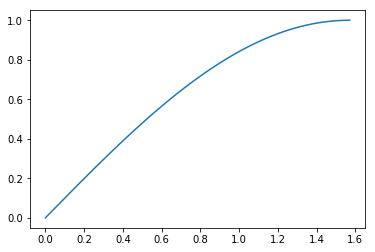

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

def f(x):
    return np.sin(x)

xvals = np.linspace(0,math.pi/2,1001)
fig,ax = plt.subplots()
ax.plot(xvals,f(xvals))

Check true value of integral using scipy.  In this case, it is also trival to evaluate by hand.

$\begin{eqnarray}
I &=& \int_0^{\frac{\pi}{2}} sin(x) dx \\
 &=& -cos(x)|^{\frac{\pi}{2}}_0 \\
 &=& 1
\end{eqnarray}$

In [2]:
from scipy.integrate import quad
i,ierr = quad(f,0,math.pi/2.)
print(i,ierr)

0.9999999999999999 1.1102230246251564e-14


Estimate the integral by sampling a uniform distribution and calculating $\langle f\rangle$.  Let's consider 100 trials and 500 proposals per trial.

In [5]:
import numpy.random as rand

N = 500
n = 100
est1 = []
for i in range(n): ## loop over trials
    x = (math.pi/2.)*rand.random(N)
    fvals = f(x)
    int_est = (math.pi/2.)*fvals.mean()
    est1.append(int_est)
est1 = np.array(est1)
print('Estimates for the first few trials: ',est1[:10])
print(r'\langle I\rangle = {:.4f}'.format(est1.mean()))
print('var(I) = (pi/2)^2 * varf / N = {:.6f}'.format((fvals.var()/N)*(0.5*np.pi)**2))

Estimates for the first few trials:  [0.97477676 1.0211102  1.01284669 1.01799161 1.02371269 1.00122656
 0.98234657 0.96015842 0.99380268 1.01133721]
\langle I\rangle = 0.9976
var(I) = (pi/2)^2 * varf / N = 0.000464


Repeat the same calculation in a more pythonic way, i.e. use numpy and avoid explicit loops.

In [6]:
x = 0.5 * np.pi * rand.random((n,N))
fvals = f(x)
int1 = 0.5 * np.pi * fvals.mean(axis=1)
print('int1 = {:.6f}'.format(int1.mean()))
varf = fvals.var()
print('var(I) = (pi/2)^2 * varf / N = {:.6f}'.format((varf/N)*(0.5*np.pi)**2))

int1 = 0.999996
var(I) = (pi/2)^2 * varf / N = 0.000466


So far everything we've done doesn't look much better than dividing the subtended area into rectangles and adding up the areas.  In the example above, we sampled values from a uniform distribution.  It seems reasonable that if the distribution we sampled was more similar to the target distribution, our estimate would improve.  Generally, the problem we want to solve is to estimate $I = \int_a^b f(x)dx = \int_a^b g(x)p(x)dx$, where $p(x)$ is the *pdf* from which we sample our $x_i$ and is chosen to be similar to $f(x)$.  

When $p(x)$ is the uniform distribution we recover our now familiar result $I = \int_a^b g(x)p(x)dx = \int_a^b \frac{g(x)dx}{b-a}$ and $g(x) = (b-a)f(x)$.  An estimate of $I$ is obtained by averaging $g(x)$ evaluated for random numbers sampled from the *pdf* $p(x)$.

For the example above, $f(x) = \sin x$, we consider the lowest order expansion as our *pdf*, i.e. $p(x) = x$.  Then, $g(x) = \frac{f(x)}{p(x)} = \frac{\sin x}{x}$.

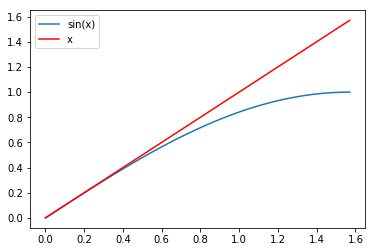

In [8]:
xvals = np.linspace(0.001,0.5*np.pi,100)
fig,ax = plt.subplots()
ax.plot(xvals,f(xvals),label='sin(x)')
ax.plot(xvals,xvals,'r-',label='x')
ax.legend()

Check the normalization of $p(x)$.

$\begin{equation}
\int_0^{\frac{\pi}{2}}x dx = \frac{x^2}{2}|_0^{\frac{\pi}{2}} = \frac{\pi^2}{8}.
\end{equation}$

So, take *pdf* $p(x) = \frac{8x}{\pi^2}$ which as a corresponding *cdf* $P(x) = \frac{4x^2}{\pi^2}$.  Inverting, we find the generating function $h(R) = \frac{\pi}{2}\sqrt{R}$.

In [11]:
def p(x):
    return 8*x/np.pi**2

def g(x):
    return f(x)/p(x)

def h(R):
    return 0.5*np.pi*np.sqrt(R)
    
R = rand.random((n,N))
x = h(R)
gvals = g(x)
int2 = gvals.mean(axis=1)
print('int2 = {:.6f}'.format(int2.mean()))
varg = gvals.var()
print('var(I) = (pi/2)^2 * varf / N = {:.8f}'.format((varg/N)*(0.5*np.pi)**2))

int2 = 1.000126
var(I) = (pi/2)^2 * varf / N = 0.00008394


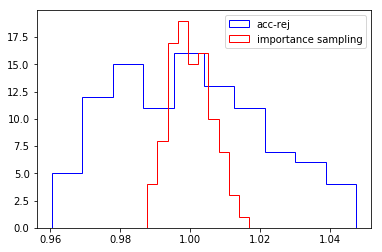

In [10]:
fig,ax = plt.subplots()
counts1,bins1,_ = ax.hist(int1,color='b',histtype='step',label='acc-rej')
counts2,bins2,_ = ax.hist(int2,color='r',histtype='step',label='importance sampling')
ax.legend()

Note that the red distribution, obtained via importance sampling, is more narrow compared to the blue distribution obtained by acceptance-rejection.  For fixed number of samples, importance sampling results in a smaller uncertainty in the estimate of the integral.